In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/openfoodfacts/clean_p2.csv
/kaggle/input/openfoodfacts/en.openfoodfacts.org.products.csv


In [2]:
# Afficher uniquement les colonnes qui nous intéressent
data = pd.read_csv('/kaggle/input/openfoodfacts/en.openfoodfacts.org.products.csv', delimiter='\t', usecols=['product_name','categories','brands','fat_100g','sugars_100g','nutriscore_grade','nutriscore_score','nutrition-score-fr_100g'])
data.head()

,product_name,brands,categories,nutriscore_score,nutriscore_grade,fat_100g,sugars_100g,nutrition-score-fr_100g
0,jeunes pousses,endives,NaN,NaN,NaN,NaN,NaN,NaN
1,L.casei,NaN,NaN,NaN,NaN,1.4,9.8,NaN
2,Vitória crackers,NaN,NaN,NaN,NaN,7.0,15.0,NaN
3,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Filetes de pollo empanado,NaN,NaN,NaN,NaN,1.9,NaN,NaN


In [3]:
# Supprimer toutes les colonnes auxquelles il manque des informations (NaN)
datasansnan = data.dropna(how='any')
datasansnan

,product_name,brands,categories,nutriscore_score,nutriscore_grade,fat_100g,sugars_100g,nutrition-score-fr_100g
7,moutarde au moût de raisin,courte paille,"Epicerie, Condiments, Sauces, Moutardes",18.0,d,8.2,22.0,18.0
27,Tarte noix de coco,"Crous Resto',Crous","Tartes, Tartes sucrées, Tartes à la noix de coco",14.0,d,22.0,21.9,14.0
37,Compote de poire,Crous,"Aliments et boissons à base de végétaux, Alime...",-2.0,a,0.0,27.0,-2.0
74,BAguette bressan,Crousresto',"Aliments et boissons à base de végétaux, Alime...",-4.0,a,2.2,0.6,-4.0
101,Rillettes de sanglier au Chouchen,Le Bois Jumel,"Viandes, Produits à tartiner, Charcuteries, Pr...",21.0,e,29.0,0.0,21.0
...,...,...,...,...,...,...,...,...
2024789,Paprikás Kukorica csemege,Spar,Extrudált Kukorica,11.0,d,24.0,1.5,11.0
2024797,Veganes Mühlenhack,Rügenwalder Mühle,"Plant-based foods and beverages,Plant-based fo...",-3.0,a,3.2,0.5,-3.0
2024806,Chocolat de Couverture Noir,Barry,"Snacks, Snacks sucrés, Cacao et dérivés, Choco...",22.0,e,46.9,26.9,22.0
2024842,Riz parfumé,King Elephant,"Aliments et boissons à base de végétaux, Alime...",0.0,b,0.5,0.0,0.0


In [4]:
# Trier les catégories afin de n'avoir que les biscuits 
databiscuit = datasansnan[datasansnan.categories.str.contains('biscuit')]
databiscuit = databiscuit.drop_duplicates()
databiscuit.describe()

,nutriscore_score,fat_100g,sugars_100g,nutrition-score-fr_100g
count,1624.000000,1624.000000,1624.000000,1624.000000
mean,19.241995,21.757792,29.281446,19.241995
std,6.680910,7.904889,13.516707,6.680910
min,-5.000000,0.000000,0.000000,-5.000000
25%,15.000000,17.000000,21.100000,15.000000
50%,21.000000,22.300000,30.000000,21.000000
75%,24.000000,27.000000,39.000000,24.000000
max,34.000000,70.000000,75.000000,34.000000


In [5]:
# Ne garder que les biscuits qui ont un bon nutri-score
# databiscuitabc = databiscuit[databiscuit.nutriscore_grade.str.contains('a') | databiscuit.nutriscore_grade.str.contains('b') |databiscuit.nutriscore_grade.str.contains('c')]

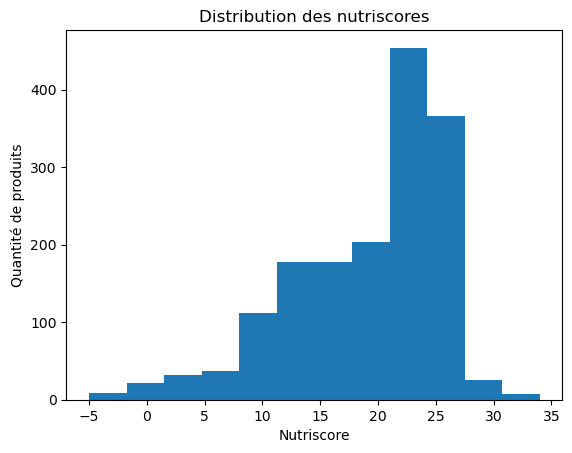

In [6]:
# Distribution des nutriscores
import matplotlib.pyplot as plt
plt.hist(databiscuit['nutriscore_score'],bins=12)
plt.title('Distribution des nutriscores')
plt.xlabel('Nutriscore')
plt.ylabel('Quantité de produits')
plt.show()

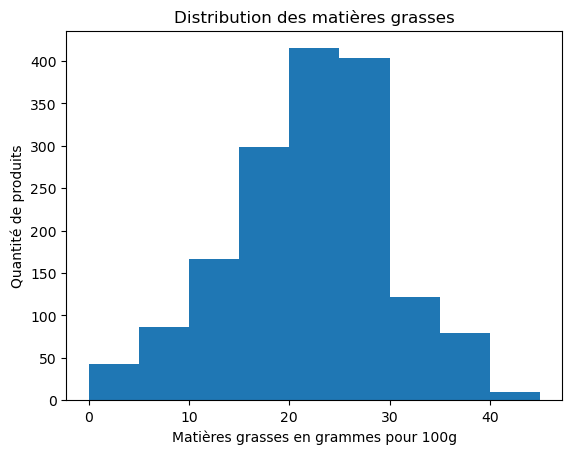

In [7]:
# Distribution des matières grasses
plt.hist(databiscuit['fat_100g'],bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
plt.title('Distribution des matières grasses')
plt.xlabel('Matières grasses en grammes pour 100g')
plt.ylabel('Quantité de produits')
plt.show()

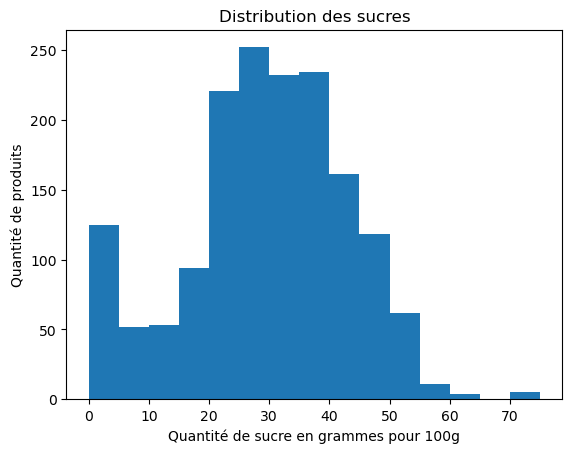

In [8]:
# Distribution des sucres
plt.hist(databiscuit['sugars_100g'],bins=15)
plt.title('Distribution des sucres')
plt.xlabel('Quantité de sucre en grammes pour 100g')
plt.ylabel('Quantité de produits')
plt.show()

In [9]:
# Machine learning

# On ajoute une librairie pour faire du clustering
from sklearn.cluster import KMeans
# On demande de faire 5 groupes
kmeans_model = KMeans (n_clusters=5, random_state=1)
# On ne prend que les colonnes avec des valeurs numériques
databiscuit_kmeans = databiscuit._get_numeric_data()
# On l'intègre au dataset
kmeans_model.fit(databiscuit_kmeans)
labels = kmeans_model.labels_

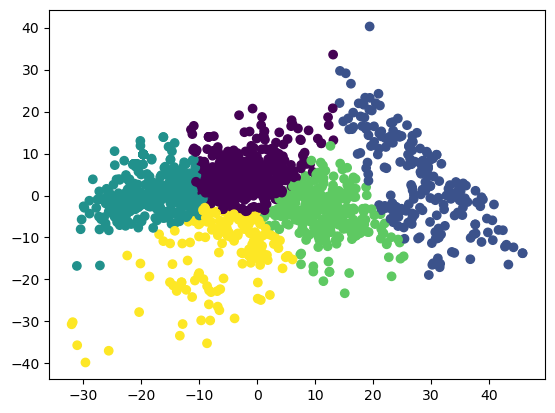

In [10]:
# On importe une librairie
from sklearn.decomposition import PCA
# On crée un graphique en lui donnant des infos
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(databiscuit_kmeans)
# On crée un graphique en nuage de points
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1],c=labels)
plt.show()

In [11]:
# On vérifie la corrélation des autres colonnes avec average_rating
databiscuit.corr()['nutriscore_score']

nutriscore_score           1.000000
fat_100g                   0.645312
sugars_100g                0.647388
nutrition-score-fr_100g    1.000000
Name: nutriscore_score, dtype: float64

In [12]:
columns = databiscuit.columns.tolist()
columns = [c for c in columns if c not in ["product_name", "brands","categories","nutriscore_grade","nutriscore_score"]]
target = 'nutriscore_score'

In [13]:
from sklearn.model_selection import train_test_split
# On sélectionne un dataset d'entrainement et on extrait un échantillon qui servira à entrainer le modèle
train = databiscuit.sample(frac=0.8, random_state=1)
# On fait un jeu de test qui ne doit pas être le jeu d'entrainement
test = databiscuit.loc[~databiscuit.index.isin(train.index)]
# On affiche les résultats
print(train.shape)
print (test.shape)

(1299, 8)
(325, 8)


In [14]:
# On va choisir un modèle qu'on récupère
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train[columns],train[target])
# On fait des prédictions en utilisant notre jeu de test
from sklearn.metrics import mean_squared_error
predictions = model.predict(test[columns])
mean_squared_error(predictions,test[target])

1.4190100160692575e-29

In [15]:
# On teste avec un nouveau modèle, l'arbre décisionnel - random forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
model.fit(train[columns],train[target])
predictions = model.predict(test[columns])
mean_squared_error(predictions,test[target])

0.02257516762272567

In [16]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
model = Perceptron()
model.fit(train[columns],train[target])
# On fait des prédictions en utilisant notre jeu de test
from sklearn.metrics import mean_squared_error
predictions = model.predict(test[columns])
mean_squared_error(predictions,test[target])

49.20307692307692

In [17]:
# Il faut ensuite créer un nouveau dataframe et mettre les données de test pour calculer le nutriscore en utilisant predictions = model.predict(test[columns])